# Version control

In [20]:
%load_ext hierarchymagic

## What is version control and why should I bother?By Jonathan Tan. 


Version control, also known as revision control or source control, is the management of changes to programs, files, documents and other collections of information.

As actuaries, our models and analysis come in many forms and vary in size depending on the task at hand. For example, a simple exercise of analysing loss ratios for a given period and product could consist only of a small R script or SQL query. On the other hand, something like a functional reserving model could easily be a one gigabyte-sized set of Excel workbooks.

The rest of the article will go through a simple example concerning a small team of 3 actuaries and how the Git system (implemented using GitHub) is to version control scripts in their day to day tasks.

## Example: FOO Insurance Ltd

It is the beginning of a new financial year for FOO insurance Ltd, and its products are due for a pricing review, which is handled by the actuarial team consisting of:

- Esther, Actuarial Manager
- Jimmy, Analyst
- Michelle, Analyst

The first step of this project is to review the age curve independently with some historical data, then produce a model to be deployed into production. After getting briefed on the relevant details and timelines, the team then spends the next week discussing and iterating through various parameters and hypotheses, and finally comes up with the agreed upon model to use:

In [1]:
%%html
<img src="img/messy_files.png", width=300, height=300>

So which exactly is the final model here? What if Esther wanted to revisit a particular iteration of the model? Does this look vaguely familiar to your old college submissions or some of the shared drives in your office? If so, you probably already practice version control in one way or another. The most primitive and clunky (but useful) method would be the "Save As" button, where another version of the working file is the snapshot, and the user is free to modify the currently opened document which produces a result similar to that shown above.

Note that these files could be the product of a small team of 3 actuaries working on a simple and straight forward project. You could imagine how much more convoluted it could get with a bigger team and a multi-stage analytics task.

The goal of the article then, is to give the reader a quick and practical way to go from that screenshot above to this:

In [14]:
%%html
<img src="img/ideal_folder.png", width=450, height=450>

Would you believe that the folder in the second screenshot contains the same amount of historical information as the first and more? This is however, limited to scripts and small files. For bigger files like excel workbooks, the article will recommend some alternative tools for the reader but will not go into detail its implementations and mechanics.

The tool we will be using for version control is Git, via the Git hosting service [Github](https://github.com/).

#### Administrative and Security Issues

Let's rewind to a week ago before the actuarial team breaks away to work on the model. The first step towards a more sustainable file structure would be for the team (or Esther) to consult the company's IT/Tech department. This is because there is a good chance that they are already utilizing the Git system and one of the many platforms for their day-to-day version control needs and would be able to provide the actuarial team with some guidance. 

If this is not the case, the team must consult the appropriate authorities within the company to make sure that Git (and the GitHub platform in the context of this article) is a white listed service program or provider and ensure data security risks are appropriately managed. It may assist the discussion with upper management to note, as of October 2018, GitHub is officially owned by Microsoft and have a enterprise service offering.

If cloud services are ruled out, another alternative that could be hosted on local servers is [Gitlab Community Edition](https://www.gitlab.com).

#### Registering and Installing

After settling all the aforementioned administrative issues, the actuarial team can now proceed to download and register for GitHub. To start off, they would want to go into the [GitHub website](https://github.com/) and create an account, or sign in if an account was already created.

In [20]:
%%html
<img src="img/github_homepage.png", width=600, height=600>

Assuming FOO Insurance Ltd does not have an existing corporate account with GitHub Enterprise, signing up for personal accounts in GitHub is totally free with a paid option as at time of writing (March 2019). All GitHub accounts also have the ability to create private repositories, which would be absolutely necessary for the team. (They might as well e-mail their pricing models to their competitors otherwise.)

#### Repository

Great! Now that all 3 of them have GitHub accounts, the next step would be to create a "location" to store all the relevant project files. In the world of Git, this is called a Repository or "Repo" for short, and repositories can be generally grouped into 2 main categories

- Local
- Remote

A local repository is just a file location residing in your local system, much like a folder in your local drive, whereas a remote repository is the "online" version which everyone sees. Esther now proceeds to create (initialize) a remote repository with the following steps so the team can start to work on the model.

In [10]:
%%html
<img src="img/init_repo.png", width=600, height=600>

There are no restrictions to naming and describing the repositories created, but the best practice would be to keep them short and concise. Also, note that "Private" was selected in this case as the folder is going to contain potentially sensitive information about FOO Insurance's pricing. The bottom 2 options can generally be left as None. In simple terms, all they are saying is:
- Esther has chosen **not** to add a .gitignore file in the new repo which tells GitHub to always ignore the changes in certain specified files.
- Esther has chosen **not** to add a license to the new repository, which means that the default copyright laws apply, and she retains all rights to the source code such that no one may reproduce, distribute, or create derivative works from it. The repo is set to private anyway, so it does not really matter.

For more information on different licenses, the official GitHub page can be found [here](https://help.github.com/en/articles/licensing-a-repository).

In [11]:
%%html
<img src="img/empty_repo.png", width=600, height=600>

We now have an empty remote repository in which the team can put all their project files into! There are generally 4 ways of using the features available on GitHub, and these are the:

- Git CLI (Command-line interface)
- Github Desktop application GUI (Graphic User Interface) <br>
- Github website<br>
- Certain IDEs with Git integration

In this article, we will try to avoid using the CLI as it can be daunting for the users who are new to Git and the concept of a version control system. Just as an example, creating a repository using the Git CLI alone would require the user to install Git from [here](https://git-scm.com/downloads), and the steps shown below correspond to the creation of a GitHub repository shown above.


In [44]:
%%html
<img src="img/create_repo_cli.png", width=400, height=400>

In the article, we will also not use any IDEs for the version control process as they all function differently and Git integration is only available for some of them.

Okay, enough of that scary stuff, let's stick with using the very friendly GitHub Desktop GUI and the website. GitHub Desktop is basically an application which can be downloaded from [here](https://desktop.github.com/) and allows the user to interact and use the GitHub features without having to go onto your web browser every single time. After all of them have installed the application, they should see a screen that looks similar to this - except that for new users, "Your Repositories" should start off empty.


In [5]:
%%html
<img src="img/gitgui_homepage.png", width=400, height=400>

Okay, let's say Esther (Manager) has created an initial script on her own computer for the age curve in R called "model.r", which uses Simple Linear Regression to model the relationship between policyholders' age and the average claims incurred. The contents of model.r looks something like this:

In [3]:
%%html
<img src="img/initial_model.png", width=300, height=300>

Nothing fancy, all the script does is to read the dataset in, instantiate a simple linear regression model and print the calculated coefficients. 

#### Git Clone

Esther now wants both Jimmy and Michelle to work on improving it and can do that by uploading the current script into the remote repository created so all 3 of them have access to it. Remember, she created a remote repository before on the GitHub website, but will need a file in her local machine which she can use to sync the documents (The local repository). Think of it as dropping some files into a local DropBox or GoogleDrive folder to sync them into your online storage. Esther can do this by simply clicking on the "Clone a Repository from the Internet" button, which would bring up the screen below.

In [7]:
%%html
<img src="img/clone_repo_gui.png", width=300, height=300>

Here, she should be able to see the newly created remote repository. Now she has to decide on a local path to store this "syncing" folder and hit clone.

In [1]:
%%html
<img src="img/local_repo.png", width=300, height=300>

We can see that the README.md file which was created on the GitHub website has been cloned into Esther's local file path. 

In [15]:
%%html
<img src="img/empty_repo_gui.png", width=450, height=450>

Also, the GitHub application now has an interface in which Esther can make and track changes. Let's see what happens when Esther drops her model.r file into the local foo_actuarial_model folder:

#### Git Add

In [16]:
%%html
<img src="img/git_add_gui.png", width=450, height=450>

We can see that the GitHub application automatically tracked all the difference within the local repository, and there is now an option to "commit" those changes. A commit is just a set of changes to a file or files within a repository. Think of it as a local "Save As" function, but way cooler sounding and every time you save, it allows you to keep records of what changes were made when and by whom. After checking through to make sure that those are indeed the files that she wants to sync, she can simply type a summary and description of the update on the bottom left of the window, and hit the "commit to master" button. (There are a set of industry best practices with regards to the format of commit messages and descriptions, but we will not go into that in this article) <br>

#### Git Commit and Push

In [17]:
%%html
<img src="img/git_commit_gui.png", width=450, height=450>

After committing the changes/ additions, she just needs to hit the "push to origin" button and the files will be synced to the online repository. 

Let's go back to the GitHub website to make sure that the files were indeed synced up.

In [6]:
%%html 
<img src="img/git_meme.png", width=450, height=450>
"source: https://www.google.com/search?q=in+case+of+fire+git+commit&source=lnms&tbm=isch&sa=X&ved=0ahUKEwir95y8lY7hAhW74HMBHcxMASQQ_AUIDigB&biw=1288&bih=761#imgrc=Z1O_vpZyL8lgVM:"

Generally, contributors of any project are encouraged to keep their commits byte-sized (pun intended) and frequent instead of a sudden 2000-line commit. This way, changes are easier to track, and it gives the reviewer a lot more options for reverting to any particular previous iteration.

In [7]:
%%html
<img src="img/github_synced.png", width=450, height=450>

Now, Esther can open that bottle of wine, relax and check back in a week while Jimmy and Michelle begin to work on the model... just kidding - being an actuarial manager, there's another fire for her to put out elsewhere!

#### Branching

Jimmy and Michelle, both having GitHub accounts and the desktop application, can now clone the repository (as shown before) with Esther's model into their respective local drives to start working on it. Each of them would then proceed to create a new "branch" of the project from their respective GitHub applications.

In [8]:
%%html
<img src="img/branch_gui.png", width=450, height=450>

So, what is a branch? A Git branch can be somewhat seen as parallel universes for documents. When creating a new repository, a default "Master" branch is always created. Let's say that:

- Jimmy thinks that the age curve is non-existent within the portfolio and decides to use a flat average claim size, whilst:
- Michelle thinks that SLR is reasonable but insufficient, and proceeds to do a more complex GLM model with training and testing datasets.

Their respective scripts will then look something like this:

In [35]:
%%html
<img src="img/different_work.png", width=600, height=500>

As we can see, both Jimmy and Michelle have changed the script according to what he/ she believes the model ought to be. However, they would not be changing the original script or "Master" branch but instead, would create a new branch (which is just a copy of master) and make their changes there. Back to the parallel universe analogy, in one of the parallel universes the script remained a SLR, but in another the script would have been a GLM!

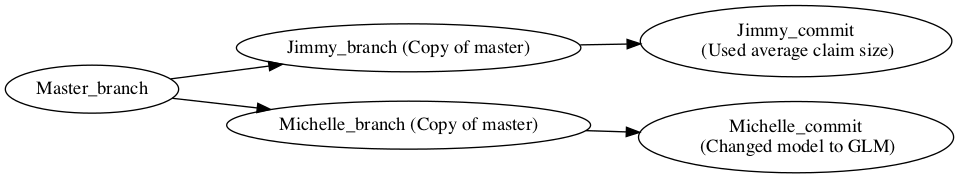

In [23]:
%%dot
digraph {
        rankdir = LR
        Master_branch -> "Jimmy_branch (Copy of master)"-> "Jimmy_commit\n (Used average claim size)"
        Master_branch -> "Michelle_branch (Copy of master)" -> "Michelle_commit\n (Changed model to GLM)"
        }

So how does GitHub know which branch to make the official one on the website?

#### Pull Requests and Merging

The short answer is, it does not. Let's initially follow Jimmy's workflow for now. Assuming he has successfully created a new branch and made his changes to the script, he can proceed to commit and push his changes to the "Jimmy branch" normally as shown before with Esther (except that Esther was pushing to Master branch).

In [9]:
%%html
<img src="img/jimmy_branch_add.png", width=450, height=450>

Now, Jimmy's GitHub repository page will look like this.

In [10]:
%%html
<img src="img/jimmy_branch_repo.png", width=450, height=450>

Notice that there is an extra "Compare and pull request" button, when clicked, should bring up a page like:

In [11]:
%%html
<img src="img/jimmy_pull.png", width=450, height=450>

By creating a pull request, Jimmy is essentially asking Esther to review his changes and:
- If she is happy with them, *merge* them into the master branch to make his changes "official", or:
- If more work needs to be done, specify the issues and discuss through comments if necessary.

Now after a week, Esther will go onto the GitHub website and see that there is a pull request made by Jimmy. When opened, it will bring up a page like this:

In [34]:
%%html
<img src="img/jimmy_pull_discussion.png", width=600, height=600>

Michelle, having gone through the same process as Jimmy, would also have a pull request for Esther to review. If Esther, thinks that Michelle's model is reasonable and no further adjustments are required, she would then merge Michelle's branch into master.

In [12]:
%%html
<img src="img/michelle_merge.png", width=450, height=450>
<img src="img/repo_final.png", width=450, height=450>

#### Version Control

Now, the master branch will consist of model.py which is a GLM model. So, you might be asking, where does the version control aspect of this tool come in? If you take a closer look at the screenshot above, you would notice "4 commits" label on the top left. If we were to click on that, it would bring us to the screen below, where we can see all previous commits made to the repository. This can also be accessed from the GitHub application under the "History" tab.

In [13]:
%%html
<img src="img/commit_history.png", width=450, height=450>
<img src="img/gitgui_commit_history.png", width=450, height=450>

When clicking on these previous commits, it reverts the repository to any previous states, allowing Esther to:

- Review the changes that have been made at that point of time
- Download any older versions of files if required
- Revert the repository back to any of the previous states if required <br>

Now, Esther can rest easy knowing that any previous decisions and changes to models are saved within the Git system without cluttering up the folders in the company drives!

## Limitations of GitHub

All of the examples shown so far have used scripts of code, which usually are not file size intensive and, being plain text, is recognizable by GitHub. Actuaries however, deal with large spreadsheets often. Git is unable to track differences within Excel - treating them as binary files - and and has an upload size limit of 100MB. This potentially limiting its ability to version control these workbooks.

## Other tools available

#### Scripting
As mentioned above, Git is the underlying version control system behind Github Destop, but there are many platforms which implement this, each with their own advantages and disadvantages. The article is only using GitHub as a specific example. The list of available GUI clients can be found [here](https://git-scm.com/downloads/guis).

As an alternative to the GitHub GUI application, the Git command line interface is another popular interface. Also, many text editors like Atom (By GitHub) and VSCode will have downloadable plugins or have Git functionalities built into them, which makes the whole process more seamless when integrating into a workflow. If you are using SAS, then Git may already be built in.

#### Excel Spreadsheets
- Creating a "Changelog" sheet to record details of the user and the changes made if past versions are not required
- Using regular backups to keep older versions of the spreadsheet when changes are made
- Unzipping .xlsx and .xlsm files (it is little known that they are actually zip files) and using git to track the resulting plain XML text within
- Using xltrail (Paid solution) which uses the same Git system <br>

#### Datasets
- Save a copy of tables to back up older versions 
- OrpheusDB

## Conclusion

It is my personal belief that, beneath all the data hype, actuaries are to some extent the data scientists for the insurance industry - as we draw out insights with financial value based on models and data - and the data science and analytics pipeline is more than just fancy machine learning algorithms. 

Documentation is an extremely important part of the actuarial process and as our models become more complex and too complex for excel to handle efficiently, our "housekeeping" and documentation processes must evolve alongside them.

The Git system is widely used in data science to maintain robust version controls for programs and scripts and could be an invaluable tool for any actuary who works with programs and code too.

> Check out Jonathan's previous Analytics Snippet ["Natural Language Processing Text Classification"](https://www.actuaries.digital/2018/11/20/analytics-snippet-natural-language-processing-text-classification/) for an introduction to interrogating text data with Python. 
> 
> For budding R users, the Young Actuaries Program and Young Data Analytics Working Group recently ran training sessions for R in advance of the Data Analytics Case Study and the content is available online! 
> 
> [Video](https://www.youtube.com/watch?v=_SvfEdp8_1c&feature=youtu.be)
> [Presentation](https://actuaries.logicaldoc.cloud/download-ticket?ticketId=db8440d1-06b5-476a-b0f5-d07aa87f38e3)
> [Code](https://github.com/ActuariesInstitute/YAP-YDAWG-R-Workshop)
> [Run R in browser](http://mybinder.org/v2/gh/ActuariesInstitute/YAP-YDAWG-R-Workshop/master?urlpath=rstudio)